<a href="https://colab.research.google.com/github/pranavirohit/cancer-drug-discovery/blob/main/model_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import csv

In [ ]:
! pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 60.9 MB/s eta 0:00:00


In [ ]:
# Importing PyTorch library functions.
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

from torch.utils.data import DataLoader
from torch.nn import ReLU
from torch.nn import Sigmoid

from torch.utils.data import TensorDataset

In [ ]:
# Importing Sklearn library functions.
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:
# Importing TensorFlow library functions.
import tensorflow as tf
from tensorflow import keras
from keras import layers as L

## Input Data

In [ ]:
# Loading chemical strcuture and cancer drug status data.
status = np.load('/content/drive/MyDrive/Data/all_cancer.npy', allow_pickle=True)
status[status == True] = 1
status[status == False] = 0
smiles = np.load('/content/drive/MyDrive/Data/all_smiles.npy', allow_pickle=True)

In [ ]:
# Splitting data into train and test sets.
x_train, x_test, y_train, y_test = train_test_split(smiles, status, test_size = 0.2)

In [ ]:
# Converting data into tensors.
x_train = tf.convert_to_tensor(x_train.astype(int))
x_test = tf.convert_to_tensor(x_test.astype(int))
y_train = tf.convert_to_tensor(y_train.astype(int))
y_test = tf.convert_to_tensor(y_test.astype(int))

## Model Architecture

In [ ]:
# Defining model architecture.
model = keras.models.Sequential()
model.add(L.Flatten(input_shape=(x_train.shape[1],)))
model.add(L.Dense(256, activation="relu"))
model.add(L.Dense(128, activation="relu"))
model.add(L.Dense(36, activation="relu"))
model.add(L.Dense(16, activation="relu"))
model.add(L.Dense(1, activation="sigmoid"))

# Compiling model.
model.compile(optimizer="adam", loss="binary_crossentropy")

# Training model.
history = model.fit(x_train, y_train, epochs = 100, batch_size = 100, validation_data = (x_test, y_test))

# Saving model.
model.save('/content/drive/MyDrive/Results/Model_1/model_1.h5')

Epoch 1/100
1156/1156 [==============================] - 13s 6ms/step - loss: 0.0603 - val_loss: 0.0525
Epoch 2/100
1156/1156 [==============================] - 6s 5ms/step - loss: 0.0416 - val_loss: 0.0500
Epoch 3/100
1156/1156 [==============================] - 6s 5ms/step - loss: 0.0309 - val_loss: 0.0553
Epoch 4/100
1156/1156 [==============================] - 6s 5ms/step - loss: 0.0189 - val_loss: 0.0631
Epoch 5/100
1156/1156 [==============================] - 6s 5ms/step - loss: 0.0100 - val_loss: 0.0772
Epoch 6/100
1156/1156 [==============================] - 6s 5ms/step - loss: 0.0061 - val_loss: 0.0806
Epoch 7/100
1156/1156 [==============================] - 6s 5ms/step - loss: 0.0047 - val_loss: 0.1032
Epoch 8/100
1156/1156 [==============================] - 6s 5ms/step - loss: 0.0036 - val_loss: 0.1146
Epoch 9/100
1156/1156 [==============================] - 6s 5ms/step - loss: 0.0034 - val_loss: 0.1097
Epoch 10/100
1156/1156 [==============================] - 6s 5ms/step - 

## Model Performance
Assessed the model on various accuracy metrics to determine validity of model, including accuracy, precision, recall, F1 Score, and ROC AUC.








In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 5600)              0         
                                                                 
 dense (Dense)               (None, 256)               1433856   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 36)                4644      
                                                                 
 dense_3 (Dense)             (None, 16)                592       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,472,005
Trainable params: 1,472,005
Non-

### Loss

In [ ]:
# Calculating the model loss (training and validation).
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Creating the DataFrame.
m1_data = {'Epoch': epochs, 'Loss': loss, 'Validation Loss': val_loss}
m1_data = pd.DataFrame(m1_data)
display(m1_data)

# Writing the DataFrame into a CSV file.
m1_data.to_csv('/content/drive/MyDrive/Results/Model_1/model_1_loss.csv', index = False)

,Epoch,Loss,Validation Loss
0,1,0.060300,0.052516
1,2,0.041648,0.049970
2,3,0.030931,0.055286
3,4,0.018944,0.063143
4,5,0.009986,0.077234
...,...,...,...
95,96,0.000177,0.251141
96,97,0.000149,0.264560
97,98,0.000184,0.248674
98,99,0.000184,0.226864


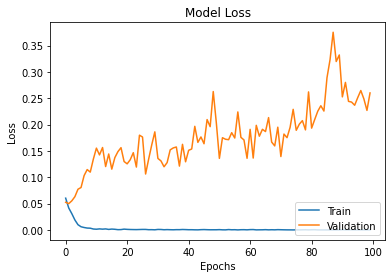

In [ ]:
# Plotting the model loss.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

In [ ]:
plt.savefig('/content/drive/MyDrive/Results/Model_1/model_1_loss.png')

<Figure size 432x288 with 0 Axes>

### Scores

In [ ]:
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred = np.round(y_pred) # Round the predictions to binary values

903/903 [==============================] - 2s 2ms/step


In [ ]:
# Calculate the scores
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Write the scores to a csv file
with open('/content/drive/MyDrive/Results/Model_1/model_1_scores.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(['Metric', 'Score'])
    writer.writerow(['Accuracy', acc])
    writer.writerow(['Precision', precision])
    writer.writerow(['Recall', recall])
    writer.writerow(['F1 Score', f1])
    writer.writerow(['ROC AUC', roc_auc])

In [ ]:
print("Accuracy: ", acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("ROC AUC: ", roc_auc)

Accuracy:  0.9870170336518488
Precision:  0.988148418269669
Recall:  0.977896066402021
F1 Score:  0.9829955108148551
ROC AUC:  0.9852963478077521


### ROC Curve

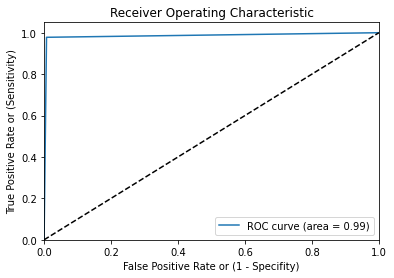

In [ ]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.show()

In [ ]:
# Save the ROC curve as a PNG file
plt.savefig('roc_curve.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.savefig('/content/drive/MyDrive/Results/Model_1/model_1_roc_curve.png')

<Figure size 432x288 with 0 Axes>